<a href="https://colab.research.google.com/github/leadeeerq/Projects/blob/main/NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Neural Nets

##Linear data

In [90]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd

In [91]:
train_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/linear/data/train.csv')
np.random.shuffle(train_df.values) #inplace, pomieszanie df

In [92]:
train_df.head()

,x,y,color
0,3.505082,2.208255,1.0
1,3.912028,3.061294,1.0
2,0.102991,1.099949,0.0
3,4.156436,3.284223,1.0
4,4.099440,3.435531,1.0


In [93]:
train_df.x.values[0:5] #poprzez x.values uzyskuję typ numpy.ndarray

array([3.50508177, 3.9120278 , 0.10299125, 4.1564359 , 4.09944049])

###Model

In [94]:
model = keras.Sequential(
    [keras.layers.Dense(4, input_shape = (2,), activation = 'relu'), #4 neurony w wartstwie ukrytej
     keras.layers.Dense(2, activation = 'sigmoid')] #Dwa neurony warstwy wyjściowej (kolor = 1 lub = 0)
)
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

In [95]:
x = np.column_stack((train_df.x.values, train_df.y.values)) #Złączenie kolumn x i y z df_train do jednej (nazwanej 'x')
model.fit(x, train_df.color.values, batch_size = 4, epochs = 5) #Batch_size - liczba elementów, na których sieć uczy się podczas jednej iteracji

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1000/1000 [==============================] - 2s 1ms/step - loss: 0.3944 - accuracy: 0.8700
Epoch 2/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0656 - accuracy: 1.0000
Epoch 3/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0253 - accuracy: 1.0000
Epoch 4/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0119 - accuracy: 1.0000
Epoch 5/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.0063 - accuracy: 1.0000


###Evaluation on the test data

In [96]:
test_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/linear/data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))

In [97]:
model.evaluate(test_x, test_df.color.values)

32/32 [==============================] - 0s 1ms/step - loss: 0.0046 - accuracy: 1.0000


[0.004632028751075268, 1.0]

##Quadratic data

In [98]:
train_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/quadratic/data/train.csv')
np.random.shuffle(train_df.values) #inplace, pomieszanie df
train_x = np.column_stack((train_df.x.values, train_df.y.values)) #Złączenie kolumn x i y z df_train do jednej (nazwanej 'train_x')

###Model

In [99]:
model = keras.Sequential(
    [keras.layers.Dense(32, input_shape = (2,), activation = 'relu'), #pierwszy int - neurony w wartstwie ukrytej
     keras.layers.Dropout(0.2), #Wyłączanie 20% neuronów z warstwy ukrytej
     keras.layers.Dense(2, activation = 'sigmoid')] #Dwa neurony warstwy wyjściowej (kolor = 1 lub = 0)
)
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(train_x, train_df.color.values, batch_size = 4, epochs = 5) #Batch_size - liczba elementów, na których sieć uczy się podczas jednej iteracji

Epoch 1/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.6684 - accuracy: 0.6332
Epoch 2/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.5041 - accuracy: 0.7523
Epoch 3/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.4177 - accuracy: 0.8188
Epoch 4/5
1000/1000 [==============================] - 2s 2ms/step - loss: 0.3609 - accuracy: 0.8475
Epoch 5/5
1000/1000 [==============================] - 1s 1ms/step - loss: 0.3160 - accuracy: 0.8840


###Evaluation

In [100]:
test_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/quadratic/data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))

model.evaluate(test_x, test_df.color.values)

32/32 [==============================] - 0s 2ms/step - loss: 0.2477 - accuracy: 0.9480


[0.24766743183135986, 0.9480000138282776]

##Clusters classifying

In [101]:
train_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/clusters/data/train.csv')
np.random.shuffle(train_df.values) #inplace, pomieszanie df
train_x = np.column_stack((train_df.x.values, train_df.y.values)) #Złączenie kolumn x i y z df_train do jednej (nazwanej 'train_x')

In [102]:
train_df.head()

,x,y,color
0,0.129270,1.979720,red
1,-0.380831,1.693519,red
2,0.718693,1.791793,red
3,0.722922,0.620655,red
4,-0.432689,0.541550,red


###Mapping the color with a dict

In [103]:
keys = (train_df['color'].unique())
print(keys)

['red' 'blue' 'green' 'teal' 'orange' 'purple']


In [104]:
values = list(range(0, len(keys)))
colors = dict(zip(keys, values))  #=> {'a': 1, 'b': 2}
colors

{'red': 0, 'blue': 1, 'green': 2, 'teal': 3, 'orange': 4, 'purple': 5}

In [105]:
train_df['color'] = train_df['color'].map(colors)

In [106]:
train_df 

,x,y,color
0,0.129270,1.979720,0
1,-0.380831,1.693519,0
2,0.718693,1.791793,0
3,0.722922,0.620655,0
4,-0.432689,0.541550,0
...,...,...,...
5995,0.973060,3.174358,5
5996,-0.894536,2.964002,5
5997,0.426649,3.511122,5
5998,-0.414503,2.712347,5


###2 different ways to map the color columns

In [ ]:
# train_df['color'] = pd.factorize(train_df.color)[0]

In [ ]:
# train_df['color'] = train_df.color.apply(lambda x: colors[x])

###Model

In [107]:
model = keras.Sequential(
    [keras.layers.Dense(32, input_shape = (2,), activation = 'relu'), #pierwszy int - neurony w wartstwie ukrytej
     keras.layers.Dense(32, activation = 'relu'),
     keras.layers.Dense(6, activation = 'sigmoid')] #6 etykiet klustrów
)
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(train_x, train_df.color.values, batch_size = 4, epochs = 5) #Batch_size - liczba elementów, na których sieć uczy się podczas jednej iteracji

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 3s 2ms/step - loss: 0.6075 - accuracy: 0.7722
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1707 - accuracy: 0.9477
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1237 - accuracy: 0.9622
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.1025 - accuracy: 0.9655
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.0911 - accuracy: 0.9677


###Evaluation

In [108]:
test_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/clusters/data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))
test_df['color'] = test_df['color'].map(colors)

model.evaluate(test_x, test_df.color.values)

38/38 [==============================] - 0s 1ms/step - loss: 0.1048 - accuracy: 0.9542


[0.10480944067239761, 0.9541666507720947]

###Prediction

In [109]:
model.predict(np.array([[0,3]]))

1/1 [==============================] - 0s 55ms/step


array([[1.1330723e-03, 6.4696915e-02, 1.1424996e-08, 2.5279614e-09,
        1.2059400e-05, 9.9852628e-01]], dtype=float32)

In [110]:
print(f'Prediction: ', np.round(model.predict(np.array([[0,3]]))))

1/1 [==============================] - 0s 21ms/step
Prediction:  [[0. 0. 0. 0. 0. 1.]]


##Complex case classification

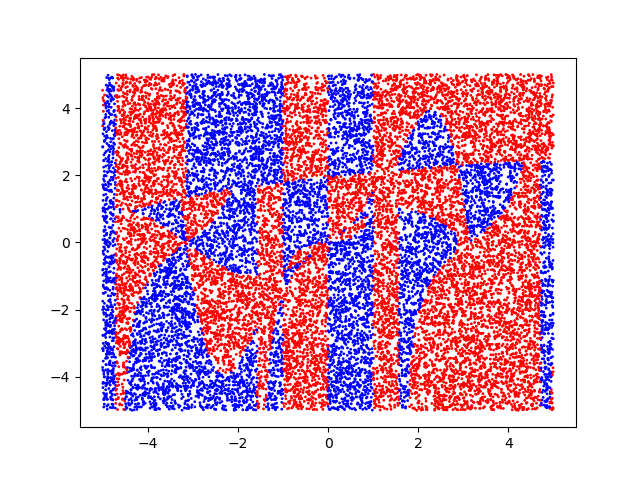

In [111]:
train_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/complex/data/train.csv')
np.random.shuffle(train_df.values) #inplace, pomieszanie df
train_x = np.column_stack((train_df.x.values, train_df.y.values)) #Złączenie kolumn x i y z df_train do jednej (nazwanej 'train_x')

In [112]:
train_df

,x,y,color
0,-3.529067,-1.072599,1.0
1,-3.739934,-2.102559,1.0
2,-2.187437,-4.475526,1.0
3,-2.291865,-0.020283,1.0
4,3.809626,-4.677126,0.0
...,...,...,...
19995,0.987387,-1.242272,1.0
19996,-0.096193,3.835872,0.0
19997,-2.881219,-2.430065,1.0
19998,-0.035318,0.708324,1.0


In [113]:
model = keras.Sequential(
    [keras.layers.Dense(256, input_shape = (2,), activation = 'relu'), #pierwszy int - neurony w wartstwie ukrytej
     keras.layers.Dropout(0.4),
     keras.layers.Dense(128, activation = 'relu'),
     keras.layers.Dropout(0.4),
     keras.layers.Dense(128, activation = 'relu'),
     keras.layers.Dense(2, activation = 'sigmoid')] #2 etykiety klustrów
)
model.compile(optimizer = 'adam',
              loss = keras.losses.SparseCategoricalCrossentropy(from_logits = True),
              metrics = ['accuracy'])

model.fit(train_x, train_df.color.values, batch_size = 4, epochs = 5) #Batch_size - liczba elementów, na których sieć uczy się podczas jednej iteracji

Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


5000/5000 [==============================] - 11s 2ms/step - loss: 0.6193 - accuracy: 0.6492
Epoch 2/5
5000/5000 [==============================] - 11s 2ms/step - loss: 0.5497 - accuracy: 0.7265
Epoch 3/5
5000/5000 [==============================] - 12s 2ms/step - loss: 0.5164 - accuracy: 0.7444
Epoch 4/5
5000/5000 [==============================] - 11s 2ms/step - loss: 0.4931 - accuracy: 0.7608
Epoch 5/5
5000/5000 [==============================] - 11s 2ms/step - loss: 0.4807 - accuracy: 0.7683


In [114]:
test_df = pd.read_csv('/content/drive/MyDrive/Projekty/Neural Networks/examples/complex/data/test.csv')
test_x = np.column_stack((test_df.x.values, test_df.y.values))

model.evaluate(test_x, test_df.color.values)

157/157 [==============================] - 0s 2ms/step - loss: 0.4251 - accuracy: 0.7978


[0.4251158833503723, 0.7978000044822693]